In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
import numpy
import os
from scipy.interpolate import RectBivariateSpline

In [10]:
#最小値0、最大値1にする数量正規化メソッド
def normalization(x):
    x_min = x.min()
    x_max = x.max()
    x_norm = (x - x_min) / (x_max - x_min)
    return x_norm   #正規化した配列を返す

In [11]:
fnam = 'HS_H08_20191101_0550_B15_JP01_R20_S0101.DAT'

fsiz = os.path.getsize(fnam)
with open(fnam,'rb') as fp:
 head = fp.read(fsiz)
 data = np.frombuffer(fp.read(),dtype='u2')

imax, = np.frombuffer(head[3:5],dtype='u2')
j,h = 0,[]
for i in range(imax):
 n, = np.frombuffer(head[j+1:j+3],dtype='u2')
 h.append(head[j:j+n])
 j += n

colum, = np.frombuffer(h[1][5:7],dtype='u2')
line, = np.frombuffer(h[1][7:9],dtype='u2')
validbit, = np.frombuffer(h[4][13:15],dtype='u2')

NCOL = int(colum)
NLIN = int(line)
VAL = int(validbit)
hsiz = os.path.getsize(fnam)- NLIN*NCOL*2
with open(fnam,'rb') as fp:
 head = fp.read(hsiz)
 data = np.frombuffer(fp.read(),dtype='u2').reshape(NLIN,NCOL)

B15 = numpy.array(data)

B15 = np.where(B15 >= 4050, 0, B15)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

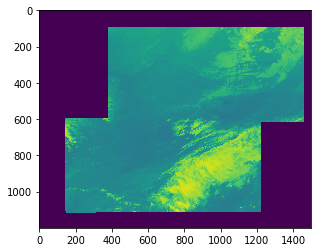

In [12]:
plt.imshow(B15);
B15

In [13]:
fnam = 'HS_H08_20191101_0550_B13_JP01_R20_S0101.DAT'

fsiz = os.path.getsize(fnam)
with open(fnam,'rb') as fp:
 head = fp.read(fsiz)
 data = np.frombuffer(fp.read(),dtype='u2')

imax, = np.frombuffer(head[3:5],dtype='u2')
j,h = 0,[]
for i in range(imax):
 n, = np.frombuffer(head[j+1:j+3],dtype='u2')
 h.append(head[j:j+n])
 j += n

colum, = np.frombuffer(h[1][5:7],dtype='u2')
line, = np.frombuffer(h[1][7:9],dtype='u2')
validbit, = np.frombuffer(h[4][13:15],dtype='u2')

NCOL = int(colum)
NLIN = int(line)
VAL = int(validbit)
hsiz = os.path.getsize(fnam)- NLIN*NCOL*2
with open(fnam,'rb') as fp:
 head = fp.read(hsiz)
 data = np.frombuffer(fp.read(),dtype='u2').reshape(NLIN,NCOL)
    
B13 = numpy.array(data)

B13 = np.where(B13 >= 65534, 0, B13)

In [14]:
fnam = 'HS_H08_20191101_0550_B11_JP01_R20_S0101.DAT'

fsiz = os.path.getsize(fnam)
with open(fnam,'rb') as fp:
 head = fp.read(fsiz)
 data = np.frombuffer(fp.read(),dtype='u2')

imax, = np.frombuffer(head[3:5],dtype='u2')
j,h = 0,[]
for i in range(imax):
 n, = np.frombuffer(head[j+1:j+3],dtype='u2')
 h.append(head[j:j+n])
 j += n

colum, = np.frombuffer(h[1][5:7],dtype='u2')
line, = np.frombuffer(h[1][7:9],dtype='u2')
validbit, = np.frombuffer(h[4][13:15],dtype='u2')

NCOL = int(colum)
NLIN = int(line)
VAL = int(validbit)
hsiz = os.path.getsize(fnam)- NLIN*NCOL*2
with open(fnam,'rb') as fp:
 head = fp.read(hsiz)
 data = np.frombuffer(fp.read(),dtype='u2').reshape(NLIN,NCOL)
    
B11 = numpy.array(data)

B11 = np.where(B11 >= 65534, 0, B11)

In [37]:
B15K = np.loadtxt('tir.03', usecols=(1,))[B15]
B13K = np.loadtxt('tir.01', usecols=(1,))[B13]
B11K = np.loadtxt('tir.09', usecols=(1,))[B11]

R = (B15K - B13K).clip(-4, 2)
G = (B13K - B11K).clip(0, 15)
B = (B13K).clip(261, 289)

gamma = 2.5
gamma = 2.5
for i in range(NCOL):
    for j in range(NLIN):
        G[j][i] = 15 * pow(float(G[j][i]) / 15, 1.0 / gamma)

array([[69.998635, 69.998635, 69.998635, ..., 69.998635, 69.998635,
        69.998635],
       [69.998635, 69.998635, 69.998635, ..., 69.998635, 69.998635,
        69.998635],
       [69.998635, 69.998635, 69.998635, ..., 69.998635, 69.998635,
        69.998635],
       ...,
       [69.998635, 69.998635, 69.998635, ..., 69.998635, 69.998635,
        69.998635],
       [69.998635, 69.998635, 69.998635, ..., 69.998635, 69.998635,
        69.998635],
       [69.998635, 69.998635, 69.998635, ..., 69.998635, 69.998635,
        69.998635]])

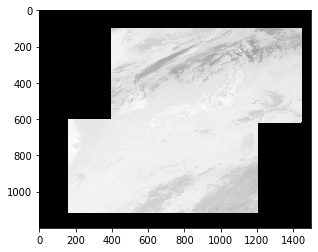

In [42]:
plt.imshow(B13K,cmap="gray");
B13K

In [16]:

R = normalization(R)
G = normalization(G)
B = normalization(B)
R = np.where(B15 == 0, 0, R)
G = np.where(B13 == 0, 0, G)
B = np.where(B13 == 0, 0, B)
rgb = np.dstack((R, G, B))
rgb = np.power(rgb, 1.0)
plt.imsave('201911010550(2).png',rgb);

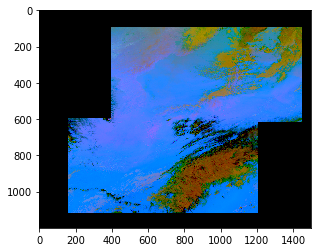

In [17]:
plt.imshow(rgb);

In [18]:
cv2.imwrite("dustrgbcv2.png",rgb)

True

In [25]:
fnam = '201803280600/HS_H08_20180328_0600_B15_JP01_R20_S0101.DAT'

fsiz = os.path.getsize(fnam)
with open(fnam,'rb') as fp:
 head = fp.read(fsiz)
 data = np.frombuffer(fp.read(),dtype='u2')

imax, = np.frombuffer(head[3:5],dtype='u2')
j,h = 0,[]
for i in range(imax):
 n, = np.frombuffer(head[j+1:j+3],dtype='u2')
 h.append(head[j:j+n])
 j += n

colum, = np.frombuffer(h[1][5:7],dtype='u2')
line, = np.frombuffer(h[1][7:9],dtype='u2')
validbit, = np.frombuffer(h[4][13:15],dtype='u2')

NCOL = int(colum)
NLIN = int(line)
VAL = int(validbit)
hsiz = os.path.getsize(fnam)- NLIN*NCOL*2
with open(fnam,'rb') as fp:
 head = fp.read(hsiz)
 data = np.frombuffer(fp.read(),dtype='u2').reshape(NLIN,NCOL)

B15 = numpy.array(data)

B15 = np.where(B15 >= 4050, 4050, B15)

fnam = '201803280600/HS_H08_20180328_0600_B13_JP01_R20_S0101.DAT'

fsiz = os.path.getsize(fnam)
with open(fnam,'rb') as fp:
 head = fp.read(fsiz)
 data = np.frombuffer(fp.read(),dtype='u2')

imax, = np.frombuffer(head[3:5],dtype='u2')
j,h = 0,[]
for i in range(imax):
 n, = np.frombuffer(head[j+1:j+3],dtype='u2')
 h.append(head[j:j+n])
 j += n

colum, = np.frombuffer(h[1][5:7],dtype='u2')
line, = np.frombuffer(h[1][7:9],dtype='u2')
validbit, = np.frombuffer(h[4][13:15],dtype='u2')

NCOL = int(colum)
NLIN = int(line)
VAL = int(validbit)
hsiz = os.path.getsize(fnam)- NLIN*NCOL*2
with open(fnam,'rb') as fp:
 head = fp.read(hsiz)
 data = np.frombuffer(fp.read(),dtype='u2').reshape(NLIN,NCOL)
    
B13 = numpy.array(data)

B13 = np.where(B13 >= 65534, 4050, B13)

fnam = '201803280600/HS_H08_20180328_0600_B11_JP01_R20_S0101.DAT'

fsiz = os.path.getsize(fnam)
with open(fnam,'rb') as fp:
 head = fp.read(fsiz)
 data = np.frombuffer(fp.read(),dtype='u2')

imax, = np.frombuffer(head[3:5],dtype='u2')
j,h = 0,[]
for i in range(imax):
 n, = np.frombuffer(head[j+1:j+3],dtype='u2')
 h.append(head[j:j+n])
 j += n

colum, = np.frombuffer(h[1][5:7],dtype='u2')
line, = np.frombuffer(h[1][7:9],dtype='u2')
validbit, = np.frombuffer(h[4][13:15],dtype='u2')

NCOL = int(colum)
NLIN = int(line)
VAL = int(validbit)
hsiz = os.path.getsize(fnam)- NLIN*NCOL*2
with open(fnam,'rb') as fp:
 head = fp.read(hsiz)
 data = np.frombuffer(fp.read(),dtype='u2').reshape(NLIN,NCOL)
    
B11 = numpy.array(data)

B11 = np.where(B11 >= 65534, 4050, B11)

B15K = np.loadtxt('tir.03', usecols=(1,))[B15]
B13K = np.loadtxt('tir.01', usecols=(1,))[B13]
B11K = np.loadtxt('tir.09', usecols=(1,))[B11]



R = (B15K - B13K).clip(-4, 2)
G = (B13K - B11K).clip(0, 15)
B = (B13K).clip(261, 289)

gamma = 2.5

In [28]:
max=0
for i in range(NCOL):
    for j in range(NLIN):
        if max<B[j][i]:
            max=B[j][i]


(1200, 1500)

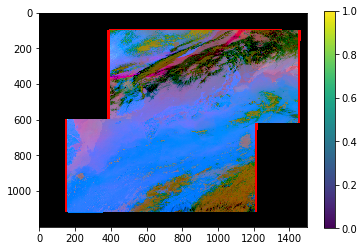

In [26]:
R = normalization(R)
G = normalization(G)
B = normalization(B)
R = np.where(B15 == 4050, 0, R)
G = np.where(B13 == 4050, 0, G)
B = np.where(B13 == 4050, 0, B)
for i in range(NCOL):
    for j in range(NLIN):
        G[j][i] = 1 * pow(float(G[j][i]) / 1, 1.0 / gamma)
rgb = np.dstack((R, G, B))
rgb = np.power(rgb, 1.0)
plt.imshow(rgb);
plt.imshow(rgb)
plt.colorbar();

In [29]:
B

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
plt.imsave('20180328dust.png',rgb);

In [30]:
max=0
for i in range(NCOL):
    for j in range(NLIN):
        if max<B[j][i]:
            max=B[j][i]
            
max

1.0